# 专业术语
- Indenter = 压头探针
- asperity junctions = 微凸起接触
- abrasive = 粗糙的

# 基本单位

In [ ]:
import dataclasses

@dataclasses.dataclass
class unit:
    Pa = 1
    GPa = 1_000_000_000 * Pa

    mm = 0.001
    cm = 0.01
    m = 1
    um = 0.000_001
    nm = 0.000_000_001
    
    N = 1
    pi = 3.1415926

# Chapter 2

## Ball-Plane Contact

$$\frac{1}{E'}=0.5[\frac{1-\nu_1^2}{E_1} + \frac{1-\nu_2^2}{E_2}]$$

$$r_a = (\frac{1.5 F_n R}{E'})^{\frac{1}{3}}$$

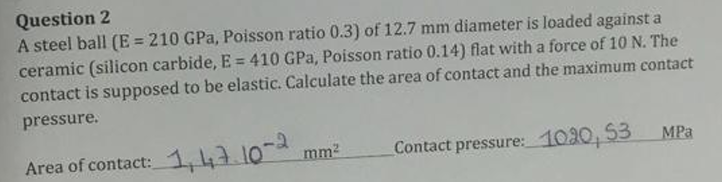

In [ ]:
@dataclasses.dataclass
class BALL:
    E: float = 210 * unit.GPa
    Pr: float = 0.3
    d: float = 12.7 * unit.mm
    r: float = d / 2

@dataclasses.dataclass
class PLANE:
    E = 410 * unit.GPa
    Pr = 0.14


@dataclasses.dataclass
class EQUATION:

    @staticmethod
    def compute_E_P(ball: BALL, plane: PLANE):
        temp = 0.5 * ( (1-ball.Pr **2)/ball.E + (1-plane.Pr **2)/plane.E )
        E_P = 1 / temp
        return E_P

    @staticmethod
    def ball_plane_contact_area(F, ball: BALL, plane: PLANE):
        E_P = EQUATION.compute_E_P(ball, plane)

        contact_r = (1.5 * F * ball.r / E_P) ** (1/3)
        contact_area = unit.pi * contact_r **2

        return contact_area

In [47]:
# 参数
ball  = BALL()
plane = PLANE()
F = 10 * unit.N

In [48]:
E_P = EQUATION.compute_E_P(ball, plane)

print("E_P =", E_P)

a_r = (1.5 * F * ball.r / E_P)**(1/3)
print("a_r =", a_r)

area = unit.pi * a_r**2
print("area =", area)

pressure_max = (3*F) / (2*area)
print("pressure_max =", pressure_max)


E_P = 297417545217.139
a_r = 6.841733180172115e-05
area = 1.4705579104495602e-08
pressure_max = 1020021033.7459197


# Chapter 3

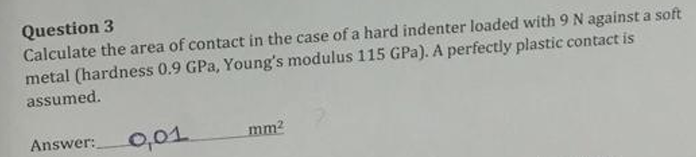

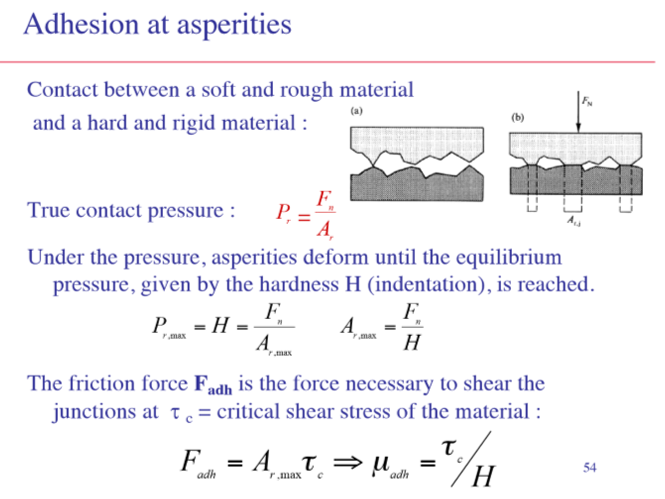

In [52]:
F = 9 * unit.N
H = 0.9 * unit.GPa
E = 115 * unit.GPa

A = F / H

print("Area = ", A / (unit.mm**2), "(mm^2)")

Area =  0.01 (mm^2)


# Chapter 4 Lubrication 润滑

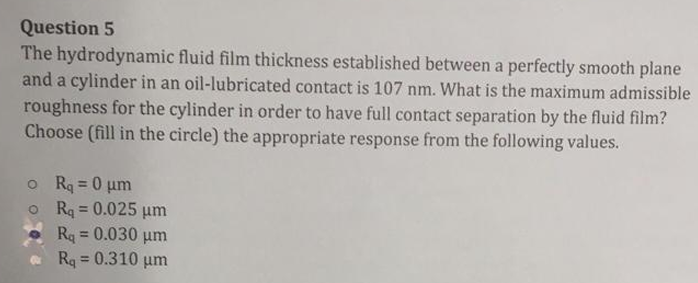

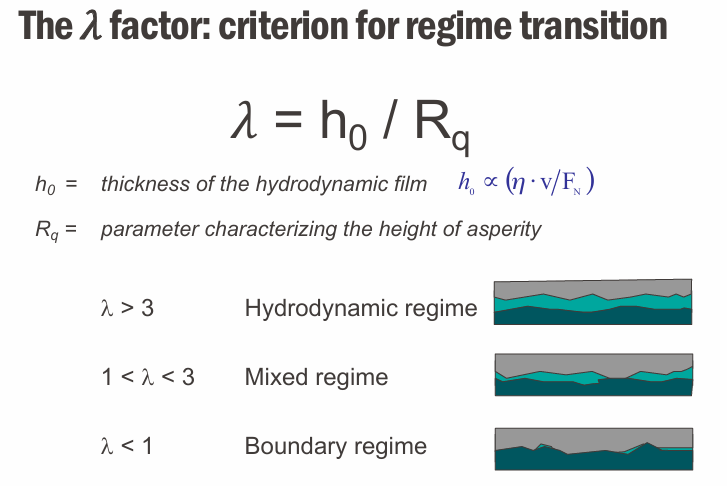

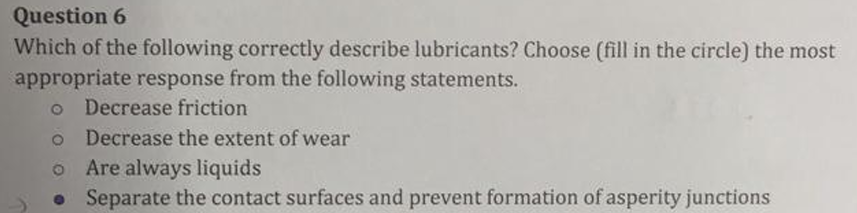

In [ ]:
_lambda = 3
thickness = 107 * unit.nm

R_q = thickness / _lambda

R_q / unit.um

0.03566666666666667

# Chapter 5 Wear 磨损

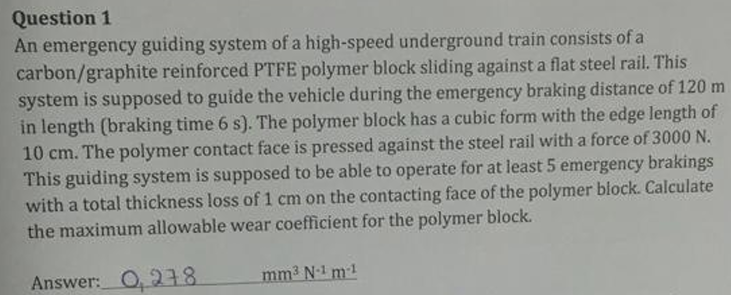

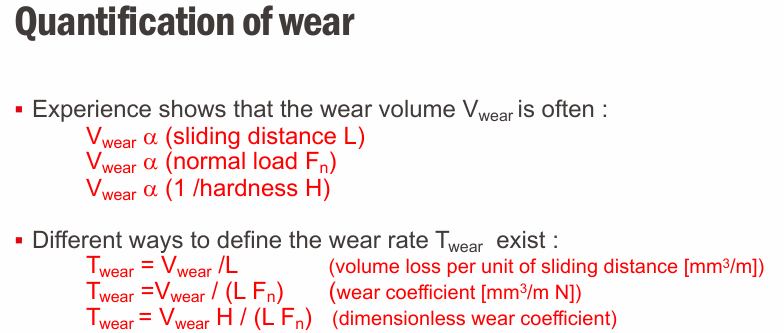

In [67]:
# breaking distance = 120 m
# breaking time     = 6 s
# Cube edge length  = 10 cm
# max loss          = 1 cm

# wear coefficient = volume / (force * distance)

F = 3000 * unit.N
L = 120 * unit.m

cube_length      = 10 * unit.cm
cube_area        = cube_length**2
cube_loss_height = 1 * unit.cm

teared_volume = cube_area * cube_loss_height

wear_coefficient = teared_volume / (F * L)
wear_coefficient / (unit.mm**3 / (unit.N * unit.m))

0.2777777777777778